# 1. TV, halftime shows, and the Big Game
Whether or not you like football, the Super Bowl is a spectacle. There's a little something for everyone at your Super Bowl party. Drama in the form of blowouts, comebacks, and controversy for the sports fan. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The half-time shows with the biggest musicians in the world, sometimes riding giant mechanical tigers or leaping from the roof of the stadium. It's a show. And in this notebook, we're going to find out how some of the elements of this show interact with each other. After exploring and cleaning our data a little, we're going to answer questions like:
- What are the most extreme game outcomes?
- How does the game affect television viewership?
- How have viewership, TV ratings, and ad cost evolved over time?
- Who are the most prolific musicians in terms of halftime show performances?

The database  use is named Superbowl. It was scraped and polished from Wikipedia and is made up of three tables, one with game data, one with TV broadcast data, and one with halftime musician performance data for all 52 Super Bowls through 2018. 

# 2. Importing all the required packages and creating a connection with PostgreSQl

In [85]:
import pandas as pd
from pandas.io import sql
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
%matplotlib inline


In [82]:
from sqlalchemy import create_engine


In [83]:
engine = create_engine('postgresql://Gauravuser:Gaurav@89@localhost:5432/Superbowl')

In [84]:
# Postgres username, password and database
POSTGRES_ADDRESS= '192.168.199.1'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'Gauravuser'
POSTGRES_PASSWORD = 'Gaurav@89'
POSTGRES_DBNAME = 'Superbowl'



In [89]:
super_bowls = pd.read_csv(r'C:\ProgramData\Microsoft\Windows\Start Menu\Programs\PostgreSQL 10\games.csv')
tv = pd.read_csv(r'C:\ProgramData\Microsoft\Windows\Start Menu\Programs\PostgreSQL 10\broadcasts.csv')
halftime_musicians = pd.read_csv(r'C:\ProgramData\Microsoft\Windows\Start Menu\Programs\PostgreSQL 10\performances.csv')

# Let's take a look at the game data, which is stored in the games table.

In [78]:
pd.read_sql('select * from games ORDER BY date_game DESC limit 5',engine)

,super_bowl,date_game,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,52,2018-02-04,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,None,Doug Pederson,New England Patriots,33,Tom Brady,None,Bill Belichick,74,8
1,51,2017-02-05,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,None,Bill Belichick,Atlanta Falcons,28,Matt Ryan,None,Dan Quinn,62,6
2,50,2016-02-07,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,None,Gary Kubiak,Carolina Panthers,10,Cam Newton,None,Ron Rivera,34,14
3,49,2015-02-01,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,None,Bill Belichick,Seattle Seahawks,24,Russell Wilson,None,Pete Carroll,52,4
4,48,2014-02-02,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,None,Pete Carroll,Denver Broncos,8,Peyton Manning,None,John Fox,51,35


# 3. Data issues in the broadcasts table
For the Super Bowl game data, we can see the dataset appears whole except for missing values in the backup quarterback columns (qb_winner_2 and qb_loser_2), which make sense given most starting QBs in the Super Bowl (qb_winner_1 and qb_loser_1) play the entire game.

Let's take a look at the TV broadcast data, which is stored in the broadcasts table.

In [16]:
pd.read_sql('SELECT * FROM broadcasts LIMIT 10',engine)


,broadcast_id,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,1,1,NBC,24430000,NaN,18.5,36,None,None,37500
1,2,1,CBS,26750000,51180000.0,22.6,43,None,None,42500
2,3,2,CBS,39120000,NaN,36.8,68,None,None,54500
3,4,3,NBC,41660000,NaN,36.0,70,None,None,55000
4,5,4,CBS,44270000,NaN,39.4,69,None,None,78200
5,6,5,NBC,46040000,NaN,39.9,75,None,None,72500
6,7,6,CBS,56640000,NaN,44.2,74,None,None,86100
7,8,7,NBC,53320000,NaN,42.7,72,None,None,88100
8,9,8,CBS,51700000,NaN,41.6,73,None,None,103500
9,10,9,NBC,56050000,NaN,42.4,72,None,None,107000


# 4. Data issues in the performances table
For the TV data, the following columns have missing values and a lot of them:

- total_us_viewers (amount of U.S. viewers who watched at least some part of the broadcast)
- rating_18_49 (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast)
- share_18_49 (average % of U.S. adults 18-49 who live in a household with a TV in use that were watching for the entire broadcast)

Let's check out the halftime musician performance data (stored in the performances table). We'll look at one

In [87]:
pd.read_sql('SELECT * FROM performances WHERE num_songs IS NULL ORDER BY super_bowl DESC',engine)

,performance_id,super_bowl,musician,num_songs
0,121,49,Arizona State University Sun Devil Marching Band,None
1,100,41,Florida A&M University Marching 100 Band,None
2,91,38,The Ocean of Soul Marching Band,None
3,90,38,The Spirit of Houston Cougar Marching Band,None
4,53,26,University of Minnesota Marching Band,None
5,46,24,The Human Jukebox,None
6,47,24,Pride of Nicholls Marching Band,None
7,45,24,Pride of Acadiana,None
8,42,22,San Diego State University Marching Aztecs,None
9,41,22,Spirit of Troy,None


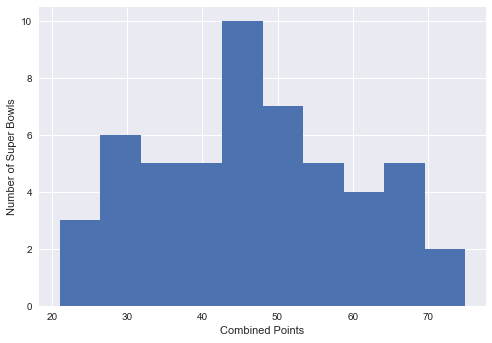

,super_bowl,date,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,29,1995-01-29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23
51,52,2018-02-04,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8


,super_bowl,date,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
2,3,1969-01-12,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9
6,7,1973-01-14,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
8,9,1975-01-12,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10


In [90]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts']< 25])

# 5. The highest- and lowest-scoring Super Bowls
We have missing numbers of songs performed (num_songs) for about a third of the performances, most of them for earlier Super Bowls.

Why all of these missing values in the broadcasts and performances tables? Was the data ever tracked? Was it lost in history? Is this a Wikipedia issue? There are a lot of potential reasons. Is the research effort to make this data whole worth it? Maybe. Watching every Super Bowl halftime show to get song counts would be pretty fun. But we don't have the time to do that kind of stuff now! Let's take note of where the dataset isn't perfect and start uncovering some insights.

Let's start by looking at combined points for each Super Bowl by pinpointing the Super Bowls with the highest and lowest scores.

In [18]:
pd.read_sql('SELECT * FROM games WHERE combined_pts >70 OR combined_pts<25',engine)

,super_bowl,date_game,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,3,1969-01-12,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,None,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9
1,7,1973-01-14,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,None,Don Shula,Washington Redskins,7,Bill Kilmer,None,George Allen,21,7
2,9,1975-01-12,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,None,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,None,Bud Grant,22,10
3,29,1995-01-29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,None,George Seifert,San Diego Chargers,26,Stan Humphreys,None,Bobby Ross,75,23
4,52,2018-02-04,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,None,Doug Pederson,New England Patriots,33,Tom Brady,None,Bill Belichick,74,8


# 6. The blowouts and nailbiters
The highest combined scores at 74 and 75, we find two games featuring dominant quarterback performances. One even happened recently in 2018's Super Bowl LII where Tom Brady's Patriots lost to Nick Foles' underdog Eagles 41-33 for a combined score of 74.

Going down to the lowest combined scores, we have Super Bowl III and VII, which featured tough defenses that dominated. We also have Super Bowl IX in New Orleans in 1975, whose 16-6 score can be attributed to inclement weather. The field was slick from overnight rain, and it was cold at 46 °F (8 °C), making it hard for the Steelers and Vikings to do much offensively. This was the second-coldest Super Bowl ever and the last to be played in inclement weather for over 30 years. The NFL realized people like points, I guess.

UPDATE: In Super Bowl LIII in 2019, the Patriots and Rams broke the record for the lowest-scoring Super Bowl with a combined score of 16 points (13-3 for the Patriots).

Let's take a look at point difference now.

In [19]:
pd.read_sql('SELECT * FROM games WHERE difference_pts=1 OR difference_pts>=35',engine)

,super_bowl,date_game,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,20,1986-01-26,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,None,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36
1,24,1990-01-28,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,None,George Seifert,Denver Broncos,10,John Elway,None,Dan Reeves,65,45
2,25,1991-01-27,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,None,Bill Parcells,Buffalo Bills,19,Jim Kelly,None,Marv Levy,39,1
3,27,1993-01-31,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,None,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
4,48,2014-02-02,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,None,Pete Carroll,Denver Broncos,8,Peyton Manning,None,John Fox,51,35


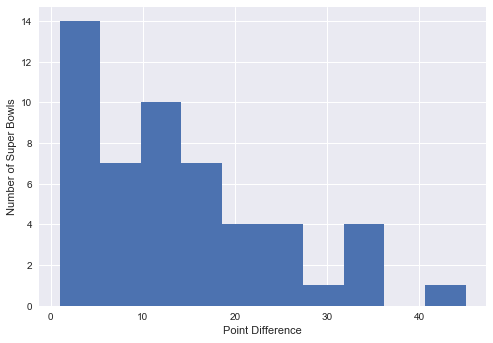

,super_bowl,date,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
24,25,1991-01-27,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,super_bowl,date,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
19,20,1986-01-26,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36
23,24,1990-01-28,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
26,27,1993-01-31,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
47,48,2014-02-02,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [91]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()
# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] >= 35])

# 7. Do blowouts translate to lost viewers?
The closest game ever was when the Buffalo Bills lost to the New York Giants by 1 point in 1991, which was best remembered for Scott Norwood's last-second missed field goal attempt that went wide right, kicking off four Bills Super Bowl losses in a row. Poor Scott. The biggest point discrepancy ever was 45 points (!) where Hall of Famer Joe Montana's led the San Francisco 49ers to victory in 1990, one year before the closest game ever.

I remember watching the Seahawks crush the Broncos by 35 points (43-8) in 2014, which was a boring experience in my opinion. The game was never really close. I'm pretty sure we changed the channel at the end of the third quarter. Let's combine our game data and TV data to see if this is a universal phenomenon. Do large point differences translate to lost viewers? Let's compare household share (average percentage of U.S. households with a TV in use that were watching for the entire broadcast) for "blowouts" (games where the point difference is three touchdowns, i.e., 21 points, or more) vs. non-blowouts.

In [21]:
pd.read_sql('SELECT blowout,AVG(difference_pts) as avg_difference_pts,AVG(share_household) as avg_share_household FROM (SELECT games.super_bowl, difference_pts, share_household,CASE WHEN difference_pts >= 21 THEN TRUE ELSE FALSE END AS blowout FROM games INNER JOIN broadcasts ON games.super_bowl = broadcasts.super_bowl) AS subquery GROUP BY blowout',engine)

,blowout,avg_difference_pts,avg_share_household
0,False,9.325000,67.825000
1,True,29.384615,61.923077


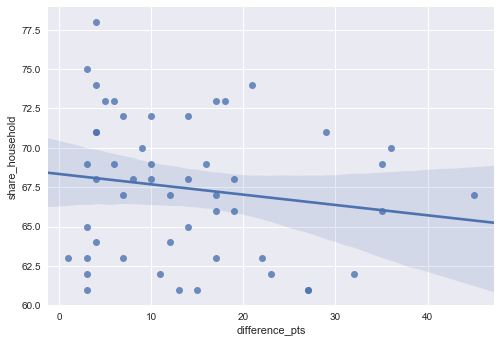

In [92]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')
import seaborn as sns
# Creating a scatter plot with a linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data=games_tv)

# 8. Viewership and the ad industry over time
We see a 6-point difference in average household share for blowouts vs. non-blowouts! Though it matches our intuition, we must take it with a grain of salt due to our small sample size of 52 games.

Regardless of the score though, I bet most people stick it out for the halftime show, which is good news for the TV networks and advertisers. A 30-second spot costs a pretty \$5 million now, but has it always been that way? And how have number of viewers and household ratings trended alongside ad cost? Let's take a look at this data in six different decades.

In [23]:
pd.read_sql('SELECT super_bowl,avg_us_viewers,rating_household,ad_cost FROM broadcasts WHERE super_bowl IN (2,12,22,32,42,52)',engine)

,super_bowl,avg_us_viewers,rating_household,ad_cost
0,2,39120000,36.8,54500
1,12,78940000,47.2,162300
2,22,80140000,41.9,645000
3,32,90000000,44.5,1291100
4,42,97448000,43.1,2699963
5,52,103390000,43.1,5000000


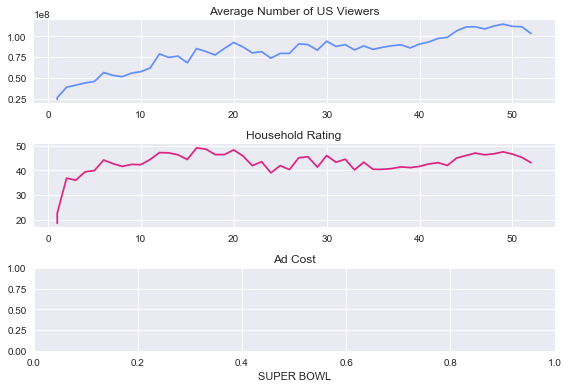

In [93]:
plt.subplot(3, 1, 1)
plt.plot(tv['super_bowl'], tv['avg_us_viewers'], color='#648FFF')
plt.title('Average Number of US Viewers')


plt.subplot(3, 1, 2)
plt.plot(tv['super_bowl'], tv['rating_household'], color='#DC267F')
plt.title('Household Rating')


plt.subplot(3, 1, 3)

plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')


plt.tight_layout()

# 9. Halftime shows weren't always this great

We can see viewers increased before ad costs did. avg_us_viewers was 90 million in 1998 (Super Bowl XXXII) and an ad cost 1.29 million dollars. That is an inflation adjusted 2.02 million dollars in 2018, where avg_us_viewers was actually 103 million and ad_cost was 5 million dollars. Maybe the networks weren't very data savvy and were slow to react. 

Another hypothesis: maybe halftime shows weren't that good in the earlier years? The modern spectacle of the Super Bowl has a lot to do with the cultural prestige of big halftime acts. I went down a YouTube rabbit hole and it turns out the old ones weren't up to today's standards. Some offenders:

- Super Bowl XXVI in 1992: A Frosty The Snowman rap performed by children.
- Super Bowl XXIII in 1989: An Elvis impersonator that did magic tricks and didn't even sing one Elvis song.
- Super Bowl XXI in 1987: Tap dancing ponies. 
                                               
It turns out Michael Jackson's Super Bowl XXVII performance, one of the most watched events in American TV history, was when the NFL realized the value of Super Bowl airtime and decided they needed to sign big name acts from then on out. The halftime shows before MJ indeed weren't that impressive, which we can see by filtering our performances table.

In [62]:
pd.read_sql("SELECT * FROM performances WHERE super_bowl <= (SELECT super_bowl FROM performances WHERE musician='Michael Jackson') ORDER BY super_bowl DESC",engine)

,performance_id,super_bowl,musician,num_songs
0,54,27,Michael Jackson,5.0
1,53,26,University of Minnesota Marching Band,NaN
2,52,26,Gloria Estefan,2.0
3,51,25,New Kids on the Block,2.0
4,47,24,Pride of Nicholls Marching Band,NaN
5,46,24,The Human Jukebox,NaN
6,45,24,Pride of Acadiana,NaN
7,50,24,Pete Fountain,1.0
8,49,24,Doug Kershaw,1.0
9,48,24,Irma Thomas,1.0


# 10. Who has the most halftime show appearances?
Lots of marching bands. American jazz clarinetist Pete Fountain. Miss Texas 1973 playing a violin. Nothing against those performers, they're just simply not Beyoncé. To be fair, no one is.

Let's see all of the musicians that have done at least one halftime show, including their performance counts.

In [63]:
pd.read_sql('SELECT musician,COUNT(*) AS count_performances FROM performances GROUP BY musician HAVING COUNT(musician)>1 ORDER BY count_performances DESC, musician ASC',engine)

,musician,count_performances
0,Grambling State University Tiger Marching Band,6
1,Al Hirt,4
2,Up with People,4
3,The Human Jukebox,3
4,Beyoncé,2
5,Bruno Mars,2
6,Florida A&M University Marching 100 Band,2
7,Gloria Estefan,2
8,Justin Timberlake,2
9,Los Angeles Unified School District All City H...,2


# 11. Who performed the most songs in a halftime show?
The world famous Grambling State University Tiger Marching Band takes the crown with six appearances. Beyoncé, Justin Timberlake, Nelly, and Bruno Mars are the only post-Y2K musicians with multiple appearances (two each).

From our previous inspections, the num_songs column has lots of missing values:

- A lot of the marching bands don't have num_songs entries.
- For non-marching bands, missing data starts occurring at Super Bowl XX.

We can filter out most marching bands by filtering out musicians with the word "Marching" and the word "Spirit" in them (a common naming convention for marching bands is "Spirit of [something]"). Then we'll filter for Super Bowls after Super Bowl XX to address the missing data issue, then let's see who has the most number of songs.

In [66]:
pd.read_sql("SELECT * FROM performances WHERE musician NOT LIKE '%%Marching%%' AND musician NOT LIKE '%%Spirit%%' AND num_songs IS NOT NULL ORDER BY num_songs DESC",engine)

,performance_id,super_bowl,musician,num_songs
0,134,52,Justin Timberlake,11
1,64,30,Diana Ross,10
2,124,49,Katy Perry,8
3,118,47,Beyoncé,7
4,44,23,Elvis Presto,7
5,101,41,Prince,7
6,132,51,Lady Gaga,7
7,131,50,Coldplay,6
8,120,48,Bruno Mars,6
9,109,45,The Black Eyed Peas,6


# 12.Conclusion

So most non-band musicians do 1-3 songs per halftime show. It's important to note that the duration of the halftime show is fixed (roughly 12 minutes) so songs per performance is more a measure of how many hit songs you have. JT went off in 2018, wow. 11 songs! Diana Ross comes in second with 10 in her medley in 1996.

In this notebook, we loaded, then explored Super Bowl game, television, and halftime show data. We visualized the distributions of combined points, point differences, and halftime show performances using histograms. We used line plots to see how ad cost increases lagged behind viewership increases. And we discovered that blowouts do appear to lead to a drop in viewers.

This year's Big Game features the Rams and the Patriots, and these two teams have actually met before in a previous Super Bowl. Who will win this time? Will the score be similar?


In [72]:
pd.read_sql("SELECT * FROM games WHERE (team_winner LIKE '%%Patriots%%' AND team_loser LIKE '%%Rams%%') OR (team_loser LIKE '%%Patriots%%' AND team_winner LIKE '%%Rams%%')",engine)

,super_bowl,date_game,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,36,2002-02-03,Louisiana Superdome,New Orleans,Louisiana,72922,New England Patriots,20,Tom Brady,None,Bill Belichick,St. Louis Rams,17,Kurt Warner,None,Mike Martz,37,3
